In [8]:
import sympy
import numpy as np

[[10.0086 -2.5736]
 [-2.5736  2.8596]]
Matrix([[1, 0], [0, 1], [-2*x, 2*y]])
(4.0*y**2 + 1.0)/(4.0*x**2 + 4.0*y**2 + 1.0)
4.0*x*y/(4.0*x**2 + 4.0*y**2 + 1.0)
(4.0*x**2 + 1.0)/(4.0*x**2 + 4.0*y**2 + 1.0)
1 + 4*Math.exp(-(3*x**2 + 10*y**4)**2)


Matrix([
[(4*y**2 + 1)/(4*x**2 + 4*y**2 + 1),        4*x*y/(4*x**2 + 4*y**2 + 1)],
[       4*x*y/(4*x**2 + 4*y**2 + 1), (4*x**2 + 1)/(4*x**2 + 4*y**2 + 1)]])

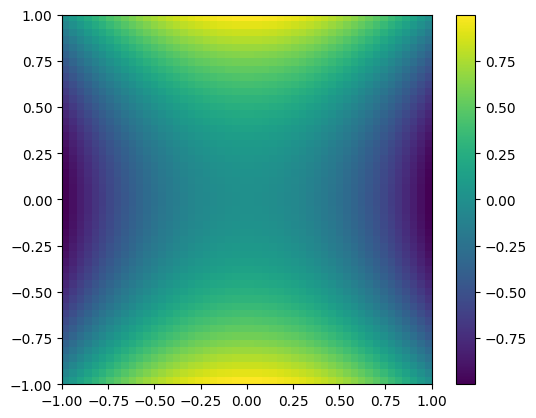

In [56]:
import sympy.vector
import matplotlib.pyplot as plt


mat = np.linalg.inv(1.3 * np.array([[0.1, 0.09], [0.09, 0.35]])).round(4)

print(mat)

x, y = sympy.symbols("x y")

expr = sympy.Matrix(
    (
        x,
        y,
        1
        * sympy.exp(-1 * (mat[0, 0] * x**2 + 2 * mat[0, 1] * x * y + mat[1, 1] * y**2))
        ** 2,
    )
)

# expr = sympy.Matrix((x, y, sympy.exp(-((-3 * x + y) ** 2))))

# # expr = sympy.Matrix((x + y, y, 0.0000001 * y))
# expr = sympy.Matrix((x, y, 0.5 * x**2 + 0.25 * y**2))
expr = sympy.Matrix((x, y, -(x**2) + y**2))
# expr = sympy.Matrix((2 * x, y, 0))

jacobian = expr.jacobian((x, y))
print(jacobian)
tensor = jacobian.T @ jacobian
tensor.simplify()
tensor_inv = sympy.Matrix(
    [[tensor[1, 1], -tensor[0, 1]], [-tensor[1, 0], tensor[0, 0]]]
) / (tensor[0, 0] * tensor[1, 1] - tensor[0, 1] * tensor[1, 0])
# convert all entries in this 2x2 matrix to javascript evaluable strings, so exp -> Math.exp etc

tensor_inv.simplify()


print(str(tensor_inv[0, 0].evalf()).replace("exp", "Math.exp"))
print(str(tensor_inv[0, 1].evalf()).replace("exp", "Math.exp"))
print(str(tensor_inv[1, 1].evalf()).replace("exp", "Math.exp"))


print(
    str(1 + 4 * sympy.exp(-1 * ((3 * x**2 + 10 * y**4) ** 2)).evalf()).replace(
        "exp", "Math.exp"
    )
)

display(tensor_inv)


# show heightmap of expr function
xs = np.linspace(-1, 1, 50)
ys = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(xs, ys)

# function to evaluate the expression at a given x, y
expression = sympy.lambdify((x, y), expr, "numpy")

Z = expression(X, Y)[2, :].squeeze()
plt.colorbar(plt.imshow(Z, extent=(-1, 1, -1, 1), origin="lower"))